In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [ ]:
df = pd.read_csv('../input/migration_original.csv')

In [ ]:
df.columns

Index(['event-id', 'visible', 'timestamp', 'location-long', 'location-lat',
       'manually-marked-outlier', 'visible.1', 'sensor-type',
       'individual-taxon-canonical-name', 'tag-local-identifier',
       'individual-local-identifier', 'study-name',
       'ECMWF Interim Full Daily Invariant Low Vegetation Cover',
       'NCEP NARR SFC Vegetation at Surface',
       'ECMWF Interim Full Daily Invariant High Vegetation Cover'],
      dtype='object')

In [ ]:
df.isnull().any()

event-id                                                    False
visible                                                     False
timestamp                                                   False
location-long                                               False
location-lat                                                False
manually-marked-outlier                                      True
visible.1                                                   False
sensor-type                                                 False
individual-taxon-canonical-name                             False
tag-local-identifier                                        False
individual-local-identifier                                 False
study-name                                                  False
ECMWF Interim Full Daily Invariant Low Vegetation Cover     False
NCEP NARR SFC Vegetation at Surface                          True
ECMWF Interim Full Daily Invariant High Vegetation Cover    False
dtype: boo

In [ ]:
print(min(df['location-long']))
print(max(df['location-long']))
print(min(df['location-lat']))
print(max(df['location-lat']))

4.02517
58.52283
-2.40633
65.2325


In [ ]:
#map = Basemap(projection='cyl')

map = Basemap(llcrnrlon=min(df['location-long']),llcrnrlat=min(df['location-lat']),urcrnrlon=max(df['location-long']),urcrnrlat=min(df['location-lat']), resolution='i' , epsg=5520 , width=10000000, height = 10000000)
#map = Basemap(llcrnrlon=-10.5,llcrnrlat=35,urcrnrlon=4.,urcrnrlat=44.,resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = -3.25)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()
plt.show()

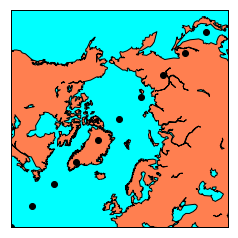

In [ ]:
map = Basemap(projection='aeqd' , lon_0=0 , lat_0=90 , width = 10000000 , height = 10000000)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral' , lake_color='aqua')
map.drawcoastlines()

for i in range(0, 10000000, 1000000):
    map.plot(i,i , marker='o' , color='k')
plt.show()

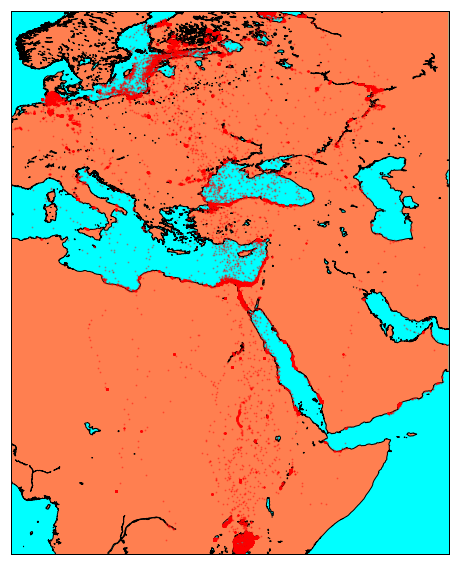

In [ ]:
LowerLattitude=df['location-lat'].min()
UpperLattitude=df['location-lat'].max()
LowerLontitude=df['location-long'].min()
UpperLontitude=df['location-long'].max()

plt.figure(figsize=(20,10))
m = Basemap(projection='mill', llcrnrlat=LowerLattitude, urcrnrlat=UpperLattitude,
            llcrnrlon=LowerLontitude, urcrnrlon=UpperLontitude, resolution='h', epsg=4269)
lons = df['location-long']
lats = df['location-lat']


x, y = m(tuple(df['location-long']), tuple(df['location-lat']))

#m.scatter(x, y, marker='D',color='m')

m.plot(x,y,'ro',markersize=1, alpha=.3, color='R' )

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines()
plt.show()

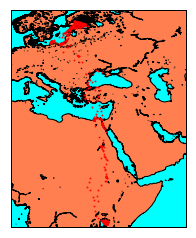

In [ ]:
list_of_animals = df['individual-local-identifier'].unique()


#print(df[df['individual-local-identifier'] == '91732A']['location-long'])

longs = df[df['individual-local-identifier'] == '91732A']['location-long']
lat = df[df['individual-local-identifier'] == '91732A']['location-lat']
x, y = m(tuple(longs), tuple(lat))

distance_travelled = 0




#m.scatter(x, y, marker='D',color='m')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines()
m.plot(x,y,'ro',markersize=1, alpha=.8, color='R' )
plt.show()

In [ ]:
import math

distance_travelled = 0

for i in range(len(longs)-1):
    longitude_change = (longs[i] - longs[i+1])**2
    latitude_change = (lat[i] - lat[i+1])**2
    distance_travelled+=math.sqrt(longitude_change + latitude_change)

print(distance_travelled)

#Checking distance travelled by each animal



353.8158020101629


In [ ]:


def distance_travelled(lats, longs):
    distance_travelled = 0
    for i in range(len(longs)-1):
        longitude_change = (longs[i] - longs[i+1])**2
        latitude_change = (lat[i] - lat[i+1])**2
        distance_travelled+=math.sqrt(longitude_change + latitude_change)
    return distance_travelled

distance_travelled(lat, longs)

test = list(set(df['individual-local-identifier']))
all_distances_travelled = {}

for i in test:
    each_animal_lat = list(df[df['individual-local-identifier']==str(i)]['location-lat'].values)
    each_animal_long = list(df[df['individual-local-identifier']==str(i)]['location-long'].values)
    try:
        all_distances_travelled[i] = distance_travelled(each_animal_lat , each_animal_long)
    except:
        print("Error with value ",i)

Error with value  91823A
Error with value  91752A
Error with value  91761A
Error with value  91789A
Error with value  91814A
Error with value  91864A
Error with value  91763A
Error with value  91739A
Error with value  91916A
Error with value  91832A
